In [18]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import matplotlib.cm as cm
import datetime 
import time
from scipy.fft import fft, ifft, fftshift
from scipy.fftpack import fftfreq
from EOF import EOF
import gc
from multiprocessing import Pool
from Load_File import Load_File

In [24]:
def load_file(PR, start_day, end_day, path, load_variable='none'): 
    #count = 0
    for i, day in enumerate(range(start_day, end_day, 25)):
        file_path = path + 'RH80_PR'+str(PR)+'_'+str(end_day)+'day_startfrom_'+str(day)+'day_final.dat'
        # show what variables are available 
        if day == start_day:
            with h5py.File(file_path, "r") as file:
                print(file.keys())
    
        if load_variable == 'none':
            return
        else:
            f       = Load_File(load_variable)
            var_tmp = np.array(f.load_data(file_path))
            #print(var_tmp.shape)
            if day == start_day:
                var = var_tmp
            else:
                var = np.concatenate((var,var_tmp))
                return var
            
    # Print variable names and values
    for var_name, var_value in locals().items():
        print(f"{var_name} = {var_value}")
    
    
# Example usage
path          = '/home/kaichiht/Colab/2025_research/Dycore_obs_Climatology/IdealizeSpetral.jl/exp/HSt42/HSt42_0/'
#function example: grid_t_p_xyzt = load_file(PR, start_day, end_day, path, variable='grid_t_p_xyzt')
grid_t_p_xyzt = load_file(0, 0, 50, path, 'grid_t_p_xyzt')


<KeysViewHDF5 ['_types', 'convection_xyzt', 'factor1_xyzt', 'factor2_xyzt', 'factor3_xyzt', 'factor4_xyzt', 'grid_div_xyzt', 'grid_geopots_xyzt', 'grid_p_full_xyzt', 'grid_p_half_xyzt', 'grid_ps_c_xyzt', 'grid_ps_p_xyzt', 'grid_t_c_xyzt', 'grid_t_n_xyzt', 'grid_t_p_xyzt', 'grid_tracers_c_max_Tiffany_xyzt', 'grid_tracers_c_max_xyzt', 'grid_tracers_c_xyzt', 'grid_tracers_diff_xyzt', 'grid_tracers_n_xyzt', 'grid_tracers_p_xyzt', 'grid_u_c_xyzt', 'grid_u_n_xyzt', 'grid_u_p_xyzt', 'grid_v_c_xyzt', 'grid_v_n_xyzt', 'grid_v_p_xyzt', 'grid_vor_xyzt', 'grid_w_full_xyzt', 'grid_z_full_xyzt', 'grid_δtracers_xyzt', 'grid_δu_xyzt', 'grid_δv_xyzt', 'spe_div_c_xyzt', 'spe_div_p_xyzt', 'spe_lnps_c_xyzt', 'spe_lnps_p_xyzt', 'spe_t_c_xyzt', 'spe_t_p_xyzt', 'spe_tracers_c_xyzt', 'spe_tracers_p_xyzt', 'spe_vor_c_xyzt', 'spe_vor_p_xyzt']>


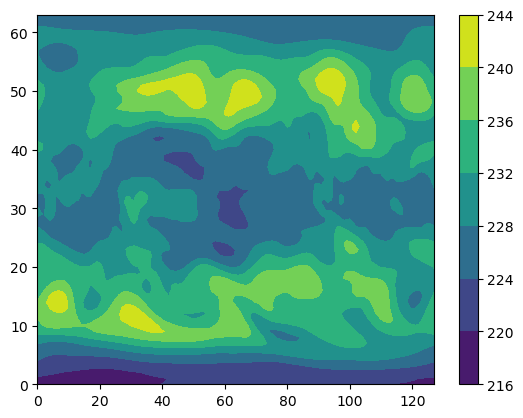

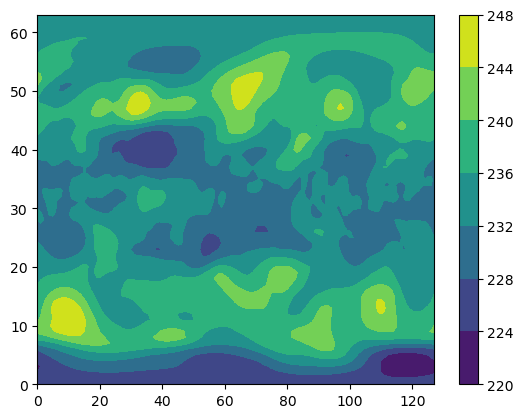

In [36]:
plt.figure()
cs=plt.contourf(grid_t_p_xyzt[-1,3,:,:])
plt.colorbar(cs)

plt.figure()
cs=plt.contourf(grid_t_p_xyzt[-40,3,:,:])
plt.colorbar(cs)